In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

from warnings import filterwarnings
filterwarnings('ignore')

%matplotlib inline

In [2]:
#read dataset 
df = pd.read_csv("pima-data.csv")
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


Explore data

In [3]:
#get info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_preg      768 non-null    int64  
 1   glucose_conc  768 non-null    int64  
 2   diastolic_bp  768 non-null    int64  
 3   thickness     768 non-null    int64  
 4   insulin       768 non-null    int64  
 5   bmi           768 non-null    float64
 6   diab_pred     768 non-null    float64
 7   age           768 non-null    int64  
 8   skin          768 non-null    float64
 9   diabetes      768 non-null    bool   
dtypes: bool(1), float64(3), int64(6)
memory usage: 54.9 KB


In [4]:
#get null values
df.isna().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

In [5]:
#get correlation

df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


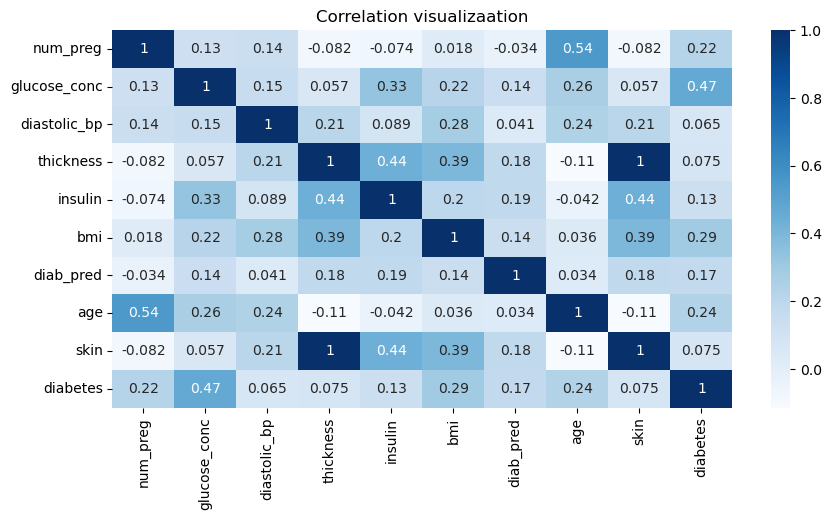

In [6]:
#visualize correlation
plt.figure(figsize=(10,5), dpi = 100)
plt.title("Correlation visualizaation")
sns.heatmap(df.corr(), annot=True,cmap="Blues");

In [7]:
#covert diabetes column to binary
from sklearn.preprocessing import LabelEncoder
#get object of LE
le = LabelEncoder()

df['diabetes_le'] = le.fit_transform(df.diabetes)
df['diabetes_le']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes_le, Length: 768, dtype: int64

In [8]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes,diabetes_le
0,6,148,72,35,0,33.6,0.627,50,1.3790,True,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,False,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,True,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,False,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,True,1


In [9]:
#split dataset to train and split 
from sklearn.model_selection import train_test_split

X = df.drop(columns=["diabetes", "diabetes_le"])
y = df.diabetes_le

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [10]:
#preview
X.head()

#y.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
0,6,148,72,35,0,33.6,0.627,50,1.3790
1,1,85,66,29,0,26.6,0.351,31,1.1426
2,8,183,64,0,0,23.3,0.672,32,0.0000
3,1,89,66,23,94,28.1,0.167,21,0.9062
4,0,137,40,35,168,43.1,2.288,33,1.3790


In [11]:
#build model
from sklearn.ensemble import RandomForestClassifier

#build an object for RF classifier 
rf = RandomForestClassifier()

#train model
rf.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
#test model
rf.score(X_train, y_train)

1.0

In [13]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes,diabetes_le
0,6,148,72,35,0,33.6,0.627,50,1.3790,True,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,False,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,True,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,False,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,True,1


In [14]:
#predict 
rf.predict([[6,148, 72, 35, 0,33.6,0.627,50,1.3790]])

array([1])

In [16]:
#export model 
import joblib

#save
joblib.dump(rf, "diabetes_rf_model.pkl")

#use model / call model
usingJoblib = joblib.load("diabetes_rf_model.pkl")
usingJoblib.predict([[6,148, 72, 35, 0,33.6,0.627,50,1.3790]])

array([1])